In [182]:
import cv2
import imghdr
import os
import tensorflow as tf
import os

In [132]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [133]:
import numpy as np
from matplotlib import pyplot as plt

In [135]:
data_dir='./data' 

In [136]:
image_ty=['jpeg','jpg','bmp','png']


In [137]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try: 
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_ty: 
                print('no image {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Cannot load image {}'.format(image_path))

In [138]:
data=tf.keras.utils.image_dataset_from_directory('data')


Found 160 files belonging to 2 classes.


In [139]:
data_iteration=data.as_numpy_iterator()


In [140]:
batch=data_iteration.next()


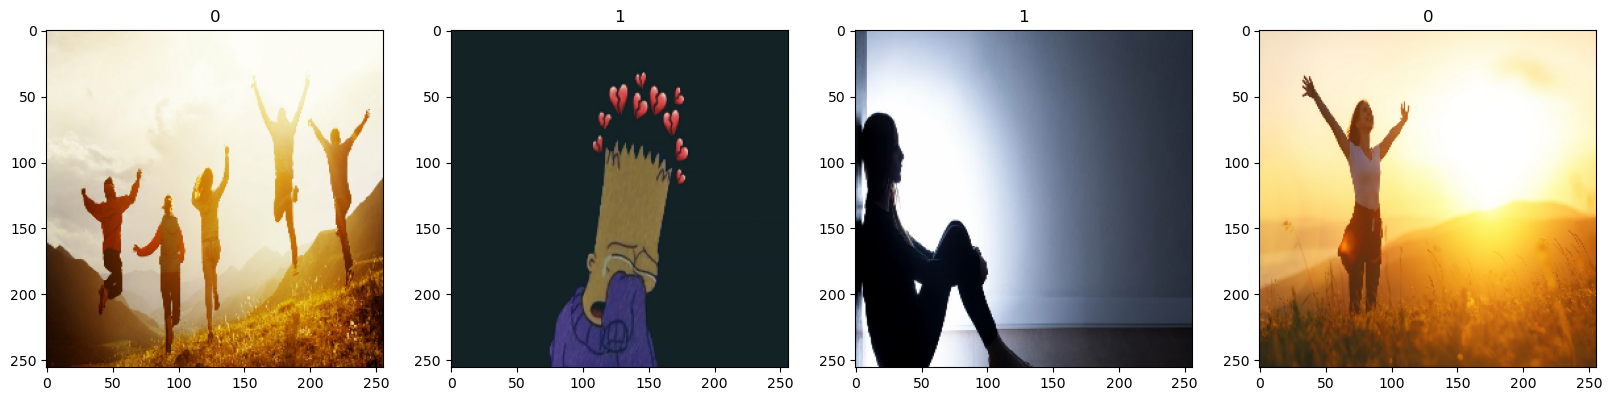

In [141]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [142]:
data=data.map(lambda x,y:(x/255,y))


In [143]:
data.as_numpy_iterator().next()

(array([[[[0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          ...,
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ]],
 
         [[0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          ...,
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ]],
 
         [[0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          ...,
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ],
          [0.9411765 , 0.9607843 , 0.9764706 ]],
 
         ...,
 
         [[0.9674709 , 0.975314  , 0.97139245],
          [0.96747

In [144]:
train_size=int(len(data)*.8)
validate_size=int(len(data)*.2)
test_size=int(len(data)*.2)

In [145]:
train=data.take(train_size)
validate=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [147]:
model = Sequential()

In [148]:
model=Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [149]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [150]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [151]:
# model.describe()

In [152]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir='logs')


In [153]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])


Epoch 1/20
4/4 [==============================] - 3s 519ms/step - loss: 1.3311 - accuracy: 0.4844 - val_loss: 0.6934 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 2s 473ms/step - loss: 0.7576 - accuracy: 0.4688 - val_loss: 0.6946 - val_accuracy: 0.4688
Epoch 3/20
4/4 [==============================] - 2s 500ms/step - loss: 0.6672 - accuracy: 0.6641 - val_loss: 0.7369 - val_accuracy: 0.3125
Epoch 4/20
4/4 [==============================] - 2s 486ms/step - loss: 0.6631 - accuracy: 0.5938 - val_loss: 0.7933 - val_accuracy: 0.4375
Epoch 5/20
4/4 [==============================] - 2s 475ms/step - loss: 0.5667 - accuracy: 0.7578 - val_loss: 1.2735 - val_accuracy: 0.3750
Epoch 6/20
4/4 [==============================] - 2s 482ms/step - loss: 0.4886 - accuracy: 0.7891 - val_loss: 1.2186 - val_accuracy: 0.4062
Epoch 7/20
4/4 [==============================] - 2s 477ms/step - loss: 0.4063 - accuracy: 0.8203 - val_loss: 1.9202 - val_accuracy: 0.3438
Epoch 8/20
4/4 [====

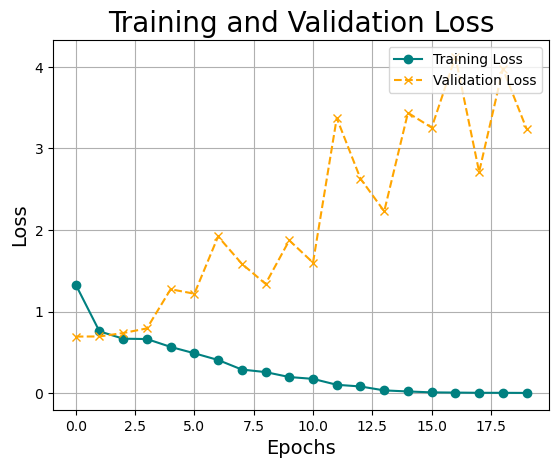

In [154]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(hist.history['loss'], color='teal', linestyle='-', marker='o', label='Training Loss')
ax.plot(hist.history['val_loss'], color='orange', linestyle='--', marker='x', label='Validation Loss')
ax.set_title('Training and Validation Loss', fontsize=20)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(loc="upper right")
ax.grid(True)
plt.show()


In [155]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [168]:
Precision=Precision()
Recall=Recall()
BinaryAccuracy=BinaryAccuracy()

In [169]:
for batch in test.as_numpy_iterator(): 
    X,y=batch
    yhat = model.predict(X)
    Precision.update_state(y, yhat)
    Recall.update_state(y, yhat)
    acc.update_state(y, yhat)

In [170]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


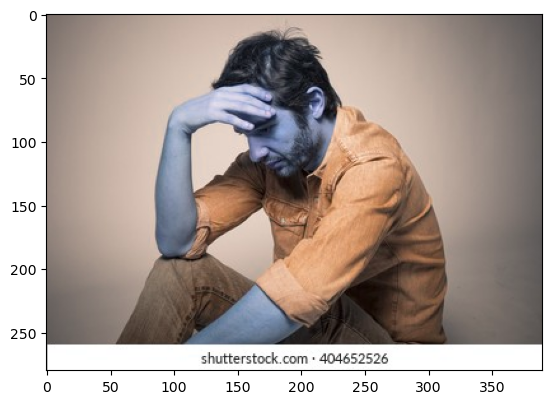

In [171]:
import cv2
img = cv2.imread('./data/sad/depressed-man-studio-shot-260nw-404652526.jpg')
plt.imshow(img)
plt.show()

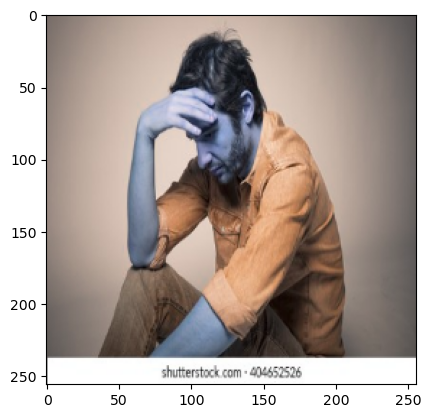

In [172]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [173]:
op=model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [174]:
if op>0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


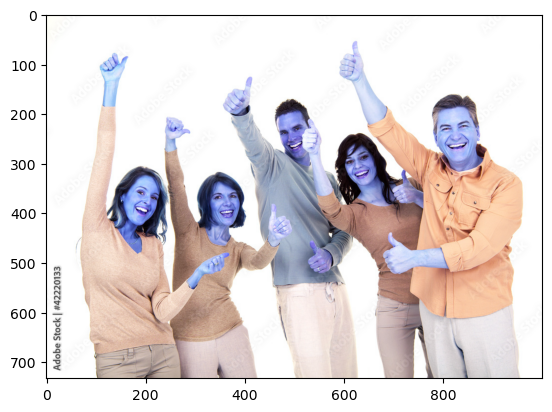

In [175]:
import cv2
img = cv2.imread('./data/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg')
plt.imshow(img)
plt.show()

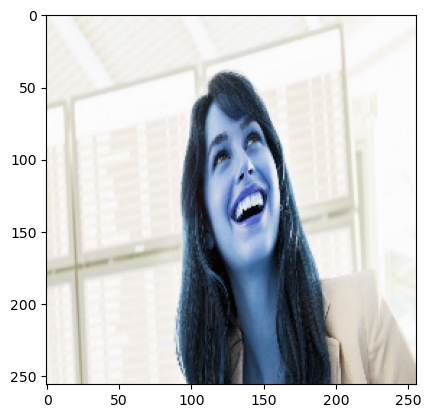

In [184]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [185]:
op = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 25ms/step


In [186]:
if op > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


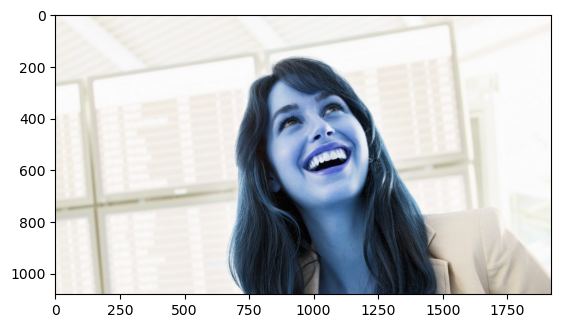

In [187]:
img = cv2.imread('./data/happy/getty_107808334_121413.jpg')
plt.imshow(img)
plt.show()

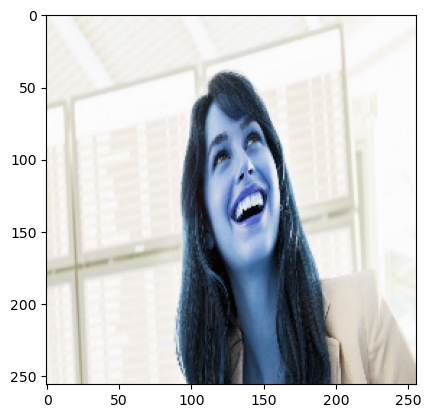

In [188]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [189]:
if op > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))
new_model = load_model('./happy_or_sad/imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))
